In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 경고 방지
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

## 1. 데이터 불러오기

In [46]:
ratings_data = pd.read_csv("ratings.csv")

ratings_data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [47]:
movie_data = pd.read_csv("movies.csv")

movie_data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [48]:
tags_data = pd.read_csv("tags.csv")

tags_data

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


## 2. 데이터 전처리 및 EDA

In [49]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [50]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [51]:
tags_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [52]:
# 무비 데이터프레임에 대한 중복값 확인
print(len(movie_data))
print(len(movie_data["movieId"].unique()))

9742
9742


세 데이터프레임 모두 결측치가 없는 것을 확인할 수 있다.

1. 연대별 영화 수 분석

In [53]:
# movie_data 연도별 컬럼 추가

year = movie_data["title"].apply(lambda x : x[-5:-1])

movie_data["year"] = year
movie_data

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [54]:
# movie data 연대별 컬럼 추가

movie_data["year_term"] = movie_data["title"].apply(lambda x : x[-5:-2] + "0")
movie_data

,movieId,title,genres,year,year_term
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1990
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,1990
4,5,Father of the Bride Part II (1995),Comedy,1995,1990
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,2010
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,2010
9739,193585,Flint (2017),Drama,2017,2010
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,2010


In [55]:
# 연대별 영화 수
movie_year_term_count = movie_data["year_term"].value_counts().sort_index()
movie_year_term_count

year_term
 Ba0       1
 Ro0       1
0070       2
0080       1
0110       2
0120       1
0140       1
1900       3
1910       7
1920      37
1930     136
1940     197
1950     279
1960     401
1970     499
1980    1177
1990    2209
2000    2847
2010    1927
9730       1
9950       1
9980       1
9990       1
ats0       1
ers0       1
he 0       1
ima0       1
irr0       1
lig0       1
lon0       1
osm0       1
r O0       1
ron0       1
Name: count, dtype: int64

2000년대 영화가 가장 많을 것을 확인할 수 있다.

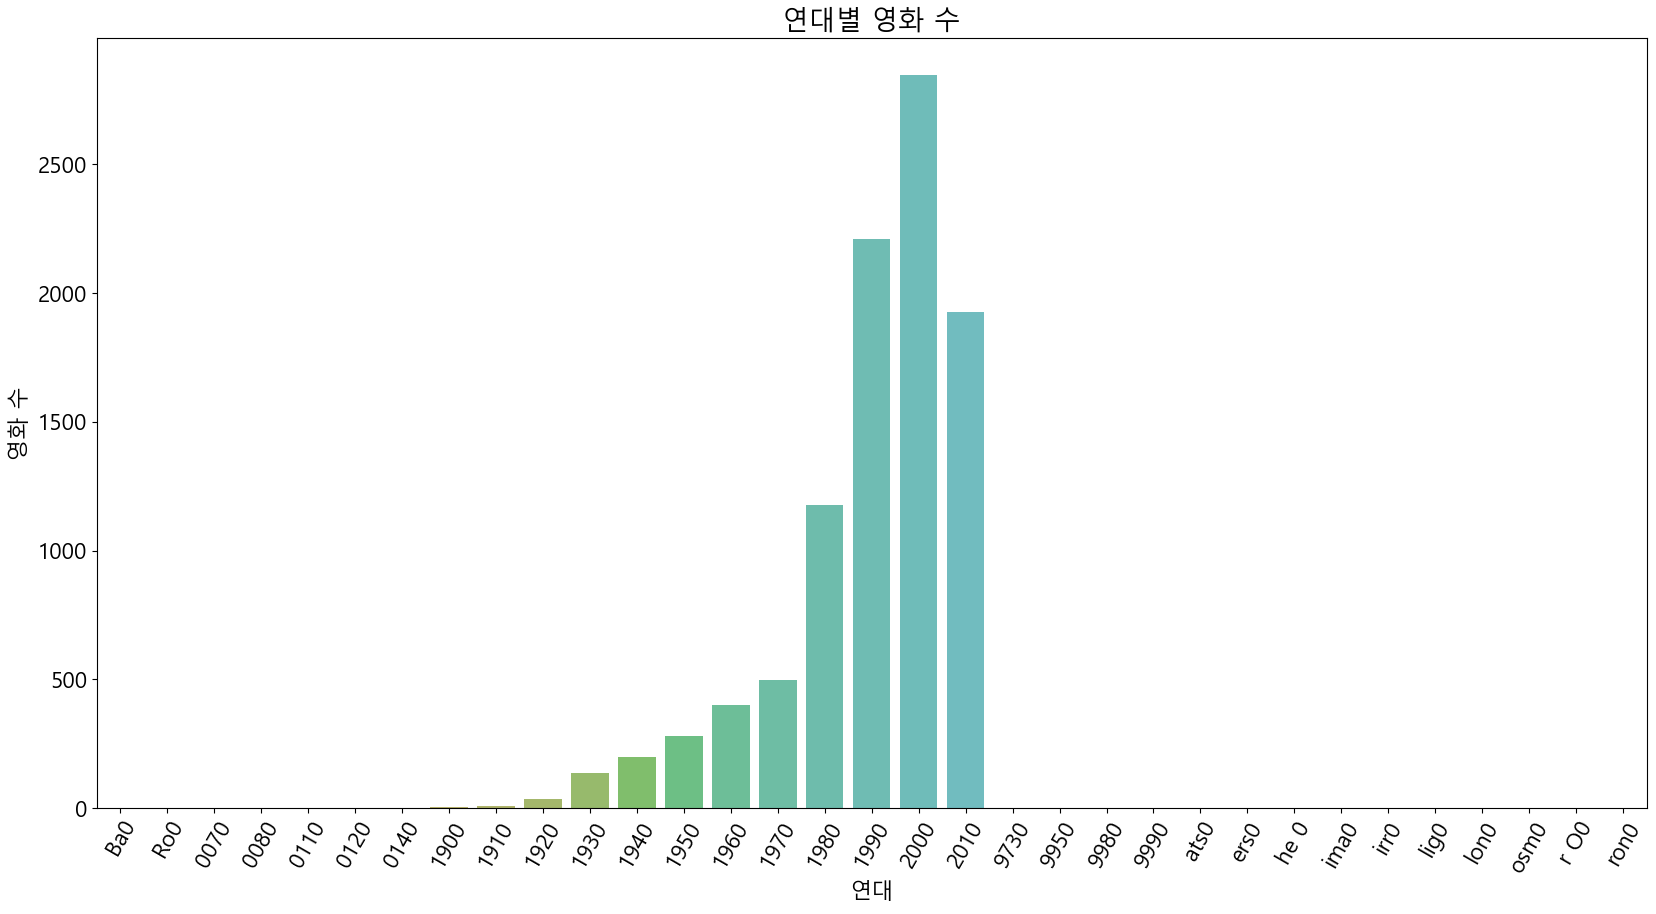

In [56]:
# 연대별 영화 수 시각화
sns.barplot(x = movie_year_term_count.index, y = movie_year_term_count.values, alpha = 0.8)
plt.title("연대별 영화 수")
plt.xlabel("연대")
plt.ylabel("영화 수")
plt.xticks(rotation = 60)

plt.show()

2. 장르별 속성 탐색

In [57]:
movie_data["genres"].value_counts()

genres
Drama                                                  1053
Comedy                                                  946
Comedy|Drama                                            435
Comedy|Romance                                          363
Drama|Romance                                           349
                                                       ... 
Action|Crime|Horror|Mystery|Thriller                      1
Adventure|Animation|Children|Comedy|Musical|Romance       1
Action|Adventure|Animation|Comedy|Crime|Mystery           1
Children|Comedy|Fantasy|Sci-Fi                            1
Action|Animation|Comedy|Fantasy                           1
Name: count, Length: 951, dtype: int64

In [58]:
movie_data['genres'] = movie_data['genres'].apply(lambda x: x.split('|'))

In [59]:
# 장르들을 담을 딕셔너리 생성
unique_genre_dict = {}

# 영화의 수만큼 반복된다.
for genres_list in movie_data['genres']: 
    # 이미 리스트로 되어 있다면, 각 장르를 직접 사용
    for genre_name in genres_list: 
        # 현재 장르의 이름으로 저장된 데이터가 없다면
        if (genre_name in unique_genre_dict) == False:
            unique_genre_dict[genre_name] = 1
        else:
            unique_genre_dict[genre_name] += 1

# unique_genre_dict 출력
print(unique_genre_dict)

{'Adventure': 1263, 'Animation': 611, 'Children': 664, 'Comedy': 3756, 'Fantasy': 779, 'Romance': 1596, 'Drama': 4361, 'Action': 1828, 'Crime': 1199, 'Thriller': 1894, 'Horror': 978, 'Mystery': 573, 'Sci-Fi': 980, 'War': 382, 'Musical': 334, 'Documentary': 440, 'IMAX': 158, 'Western': 167, 'Film-Noir': 87, '(no genres listed)': 34}


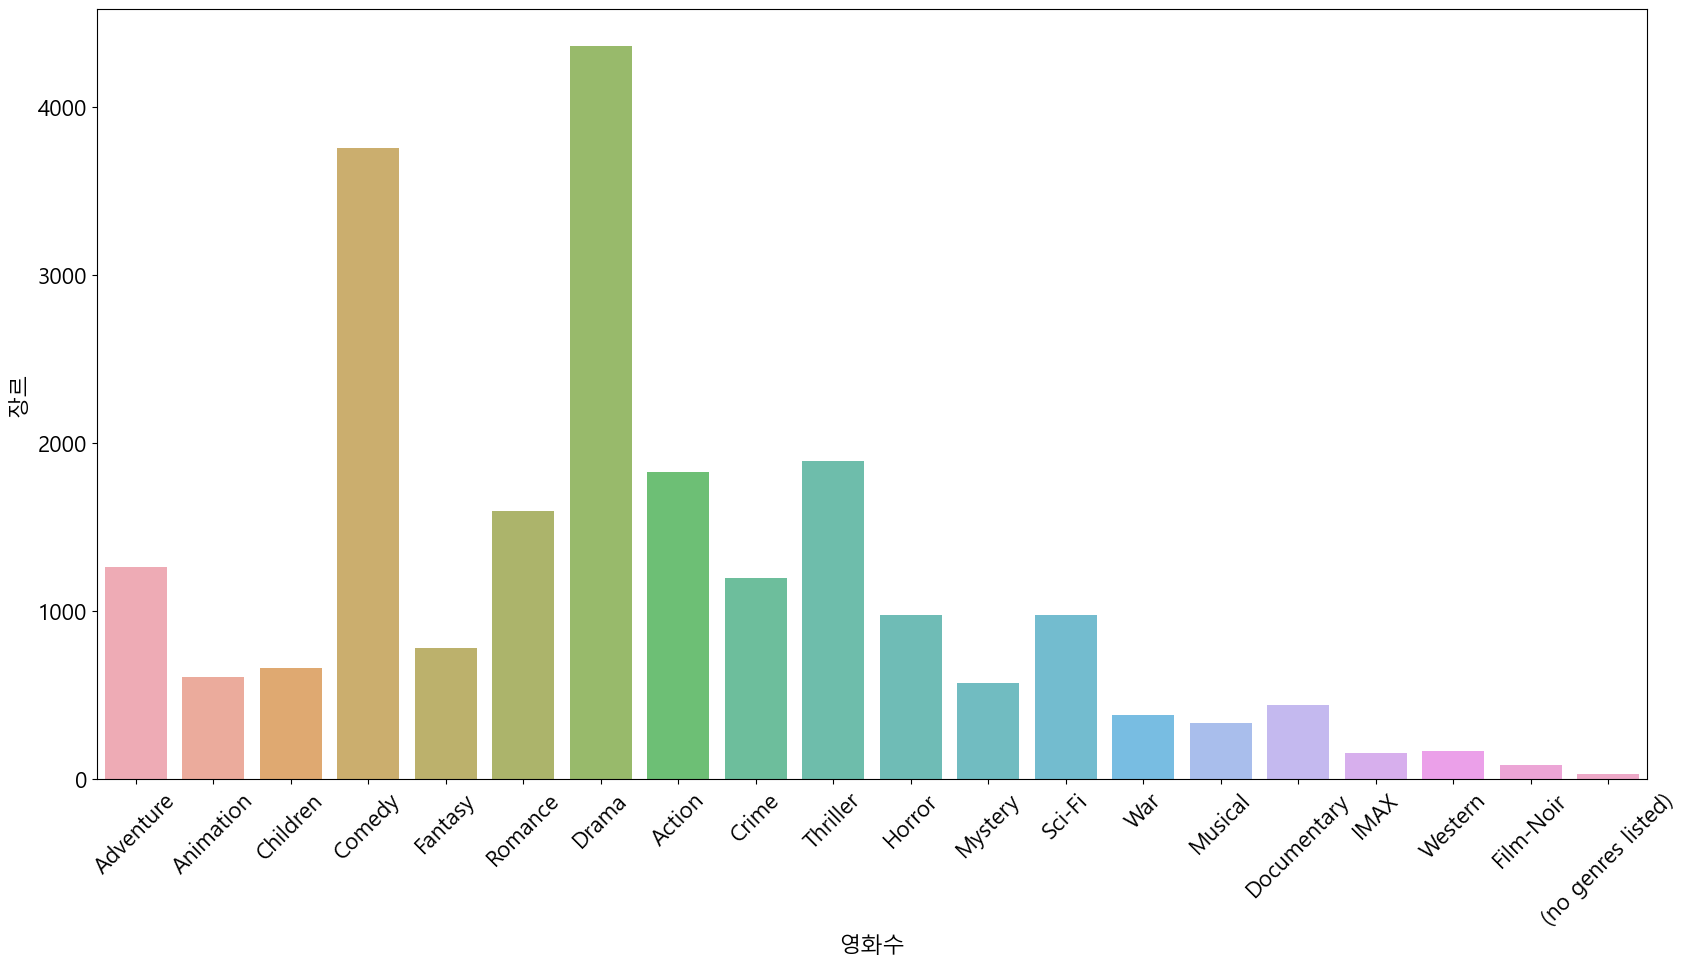

In [60]:
x = list(unique_genre_dict.keys())
y = list(unique_genre_dict.values())
sns.barplot(x= x, y = y, alpha=0.8)
plt.xlabel("영화수")
plt.xticks(rotation = 45)
plt.ylabel("장르")
plt.show()

드라마와 코미디가 가장 많은 비중을 차지하고 있다. 대중들이 호불호 없이 접할 수 있는 장르이기 때문에 위와 같은 결과가 나온 것으로 판단된다.

3. 사용자별 집계 확인

In [61]:
user_info = ratings_data.groupby(['userId'])['movieId'].count()

print(user_info.head())

userId
1    232
2     29
3     39
4    216
5     44
Name: movieId, dtype: int64


In [62]:
user_info.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

* 사용자가 매긴 영화수를 확인해보았다. 
* 위와 같이 한 사람이 최대 2698개의 평점을 매긴 것을 확인할 수 있다.
* 따라서 특정 유저들이 많은 영화 평점을 남긴 것으로 보아 편향이 있을 수도 있다.

Text(0.5, 18.44444444444445, 'user')

<Figure size 1200x600 with 0 Axes>

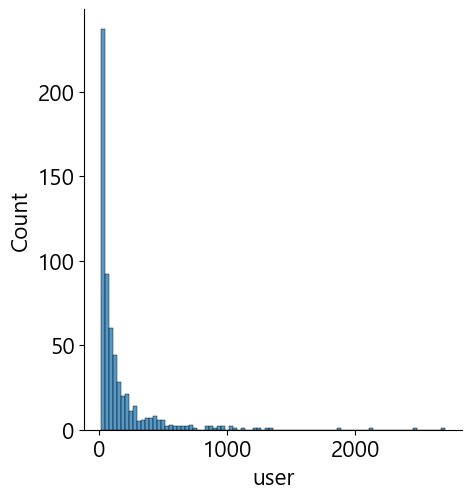

In [63]:
plt.figure(figsize=(12,6))

sns.displot(user_info.values)
plt.xlabel("user")


## 3. Memory Based CF

In [70]:
import surprise
from surprise import SVD, Dataset, Reader, KNNWithMeans, KNNBasic, accuracy
from surprise.model_selection import train_test_split

In [65]:
data = Dataset.load_builtin('ml-100k')
train_data, test_data = train_test_split(data, test_size= 0.3)

In [66]:
#테스트
#ratings_dict = {
#        "item_Id" : [1,2,3,1,2,3,2],
#        "user_Id" : ['a','a','a','b','b','b','c'],
#        "rating" : [2, 4, 4, 4, 4, 5, 6]
#        }
#df = pd.DataFrame(ratings_dict)
#df

In [67]:
# MovieLens 데이터셋
ratings_data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [68]:
# 평점 최대 최소 확인
ratings_data["rating"].agg(["min", "max"])

min    0.5
max    5.0
Name: rating, dtype: float64

최소 0.5, 최대 5.0이기 때문에 rating_scale은 0.5~5.0으로 설정하고자 한다.

In [74]:
#reader 생성
reader = Reader(rating_scale=(0.5, 5.0))

# 데이터 생성
a1 = ratings_data[["userId", "movieId", "rating"]]
data = Dataset.load_from_df(a1, reader)

# KNNwithMeans
model = KNNWithMeans()
surprise.model_selection.cross_validate(model, data, measures=['RMSE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9060  0.9004  0.9083  0.9049  0.0033  
Fit time          0.08    0.08    0.09    0.08    0.00    
Test time         1.10    0.94    0.96    1.00    0.07    


{'test_rmse': array([0.90603704, 0.90044931, 0.90831947]),
 'fit_time': (0.07551097869873047, 0.0814061164855957, 0.08560943603515625),
 'test_time': (1.1002304553985596, 0.9381165504455566, 0.9565482139587402)}

In [75]:
# KNNBasics
model = KNNBasic()
surprise.model_selection.cross_validate(model, data, measures=['RMSE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9559  0.9531  0.9671  0.9587  0.0061  
Fit time          0.06    0.08    0.08    0.07    0.01    
Test time         1.00    0.86    0.88    0.91    0.07    


{'test_rmse': array([0.95588347, 0.9530836 , 0.96714957]),
 'fit_time': (0.06087231636047363, 0.07695627212524414, 0.07594013214111328),
 'test_time': (1.004103183746338, 0.8559927940368652, 0.8785672187805176)}

## 4. Model based CF

In [76]:
# SVD
model = SVD()
surprise.model_selection.cross_validate(model, data, measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8827  0.8790  0.8779  0.8799  0.0020  
Fit time          0.61    0.61    0.61    0.61    0.00    
Test time         0.25    0.09    0.24    0.19    0.07    


{'test_rmse': array([0.88265138, 0.87903207, 0.87790086]),
 'fit_time': (0.6066701412200928, 0.6135931015014648, 0.6051647663116455),
 'test_time': (0.24525833129882812, 0.08995270729064941, 0.23523497581481934)}